## Clustering 

In this notebook we explore clustering otherwise known as unsupervised learning. In order to examine the effects of clustering it is useful to have a data-set that is labeled with class labels as then we can visualize observe how well the identified clusters correspond to the original clusters. Notice that the clustering algorithms we will explore do NOT take into account the class labels. They are simply used to color the points in the visualizations. Let's start by loading and visualizing a data set consisting of audio features representing music tracks. There are 3 genres (classical, jazz, heavy metal) with 100 instances each. The first data-set we will examine consists of 2 features per track to make visualization easy. Let's look at a scatter plot of the points corresponding to each music track and use color to indicate what is the original class. The scikit-learn documentation has a lot of examples of clustering with interesting plots and visualizations. 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering


(300, 2)
(300,)


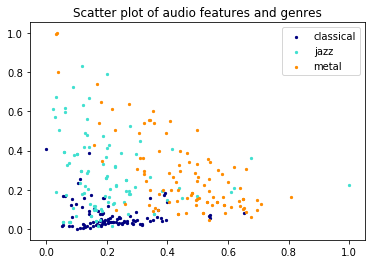

In [2]:
(X, y) = datasets.load_svmlight_file("data/3genres.arff.libsvm")
X = X.toarray()
X = MinMaxScaler().fit_transform(X)
y = y.astype(int)
target_names = ['classical', 'jazz', 'metal']

print(X.shape)
print(y.shape)
colors = ['navy', 'turquoise', 'darkorange']

for n, color in enumerate(colors):
    data = X[y == n]
    # Plot the training data 
    plt.scatter(data[:, 0], data[:, 1], s=5, color=color,
                    label=target_names[n])
    plt.title('Scatter plot of audio features and genres')
    plt.legend(scatterpoints=1, loc='upper right', prop=dict(size=10))

plt.show()


## K-means clustering

We can perform k-means clustering on this data with 3 clusters and using the resulting clusters as a way to predict a class label. The fit_predict function of clustering algorithms does just that. Notice that the clustering assign each point to a cluster in an unsupervised manner i.e it only takes into account X not y like classifiers do. Comparing the original scatter plot with the resulting predictions of the clustering algorithm shows where potential erros can happen. As you can see the dark blue cluster "takes over" some of the light blue cluster. 

We can also look at other clustering methods such as spectral clustering and Gaussian Mixture Models. 


/Users/jshier/opt/anaconda3/envs/CSC475/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/Users/jshier/opt/anaconda3/envs/CSC475/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/Users/jshier/opt/anaconda3/envs/CSC475/lib/python3.7/site-packages/ipykernel_launcher.py:19: Matplo

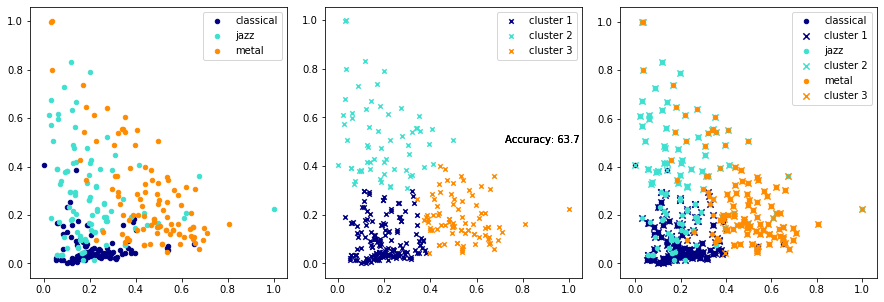

/Users/jshier/opt/anaconda3/envs/CSC475/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/Users/jshier/opt/anaconda3/envs/CSC475/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/Users/jshier/opt/anaconda3/envs/CSC475/lib/python3.7/site-packages/ipykernel_launcher.py:19: Matplo

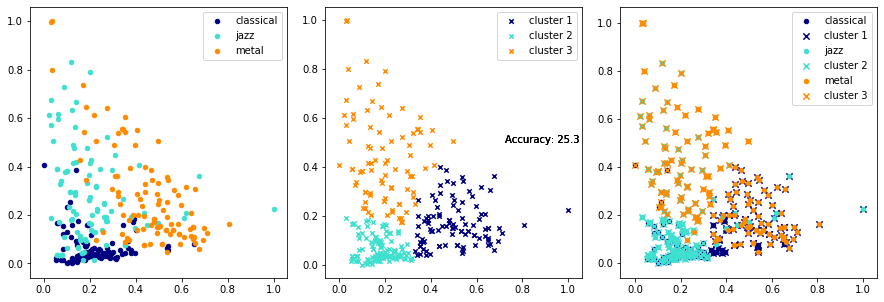

/Users/jshier/opt/anaconda3/envs/CSC475/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/Users/jshier/opt/anaconda3/envs/CSC475/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/Users/jshier/opt/anaconda3/envs/CSC475/lib/python3.7/site-packages/ipykernel_launcher.py:19: Matplo

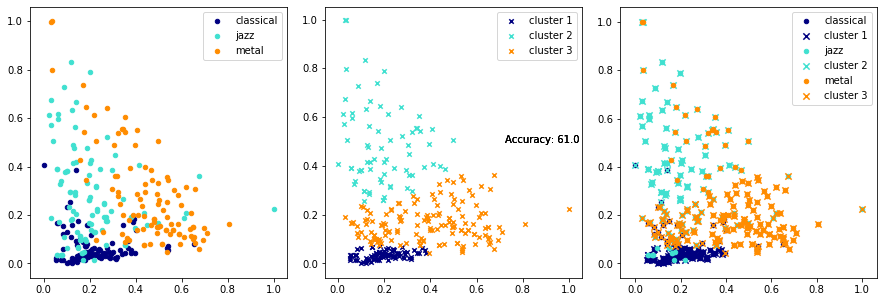

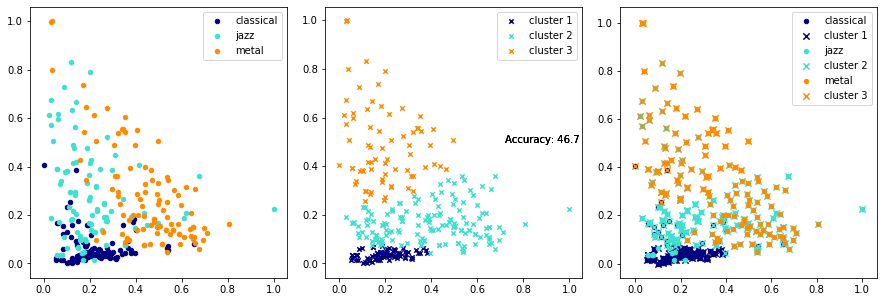

In [4]:
random_state = 170
cluster_names = ['cluster 1', 'cluster 2', 'cluster 3']

def plot_clustering(X,y,y_pred): 
    fig = plt.figure(figsize=(12,4))
    for n, color in enumerate(colors):
        data = X[y == n]
        # Plot the training data 
        plt.subplot(131)
        plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.15, left=.01, right=.99)
        plt.scatter(data[:, 0], data[:, 1], s=20, color=color,label=target_names[n])
        plt.legend(scatterpoints=1, loc='upper right', prop=dict(size=10))
    
        # Plot the cluster predictions 
        data = X[y_pred == n]
        h = plt.subplot(132)
        plt.scatter(data[:, 0], data[:, 1], s=20, marker='x',color=color,label=cluster_names[n])
        plt.legend(scatterpoints=1, loc='upper right', prop=dict(size=10))
        plt.subplot(133)
  
        data = X[y == n]
        plt.scatter(data[:, 0], data[:, 1], s=20, color=color,
                    label=target_names[n]) 
        data = X[y_pred == n]

        plt.scatter(data[:, 0], data[:, 1], s=40, marker='x',color=color,
                    label=cluster_names[n])
        plt.legend(scatterpoints=1, loc='upper right', prop=dict(size=10))

        train_accuracy = np.mean(y_pred.ravel() == y.ravel()) * 100
        plt.text(0.7, 0.5, 'Accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)
    plt.show()


y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)
plot_clustering(X,y,y_pred)
y_pred = SpectralClustering(n_clusters=3, eigen_solver='arpack',
                            random_state=random_state,assign_labels = 'kmeans', 
                            affinity='nearest_neighbors').fit_predict(X)
plot_clustering(X,y,y_pred)
gmm = GaussianMixture(n_components=3, random_state=50, max_iter=100)
gmm.fit(X)
y_pred = gmm.predict(X)
plot_clustering(X,y,y_pred)

# rerrange cluster numbers to make things work 
cluster_mapping = {} 
cluster_mapping[0] = 0
cluster_mapping[1] = 2 
cluster_mapping[2] = 1 
y_mapped_predict = np.array([cluster_mapping[i] for i in y_pred])
y_mapped_predict[y_pred == 0] = 0
y_mapped_predict[y_pred == 1] = 2 
y_mapped_predict[y_pred == 2] = 1
plot_clustering(X,y,y_mapped_predict)


### Clustering with k-means visualized in 3 dimensions

If we increase the number of feature we use to represent each music track to 3 then we can do scatter plots and perform clustering in the resulting 3D space. In most actual applications clustering is performed in high-dimensional feature spaces so visualization is not easy. At the end of this notebook we explore Principal Component Analysis a methodology for dimensionality reduction. 


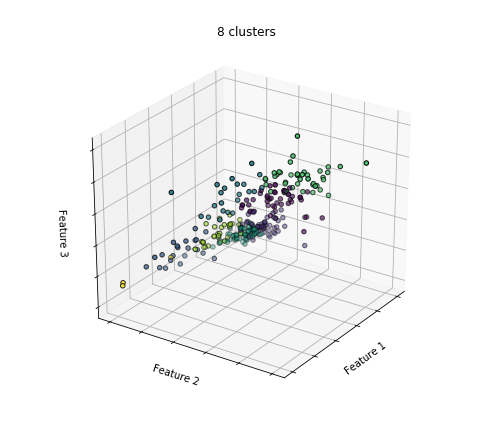

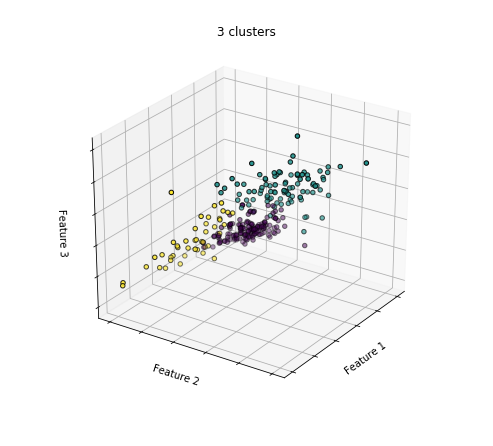

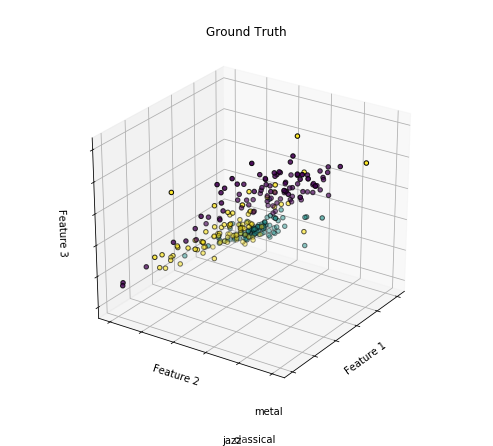

In [5]:

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

(X, y) = datasets.load_svmlight_file("data/3genres_4features.arff.libsvm")
X = X.toarray()
X = MinMaxScaler().fit_transform(X)
target_names = ['classical', 'jazz', 'metal']
y = y.astype(int)

estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ]

fignum = 1
titles = ['8 clusters', '3 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(7, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=28, azim=34)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(7, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=28, azim=34)

for name, label in [('classical', 0),
                    ('jazz', 1),
                    ('metal', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean()-1.5, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Ground Truth')
ax.dist = 12
plt.show()



## Clustering usig GMMs 

The idea behind clustering using Gaussian Mixture Models is that each cluster will correspond to a different 
Gaussian shaped component. When visualized in 2D these components can be represented as ellipses. When the covariance matrix is diagonal then these ellipses will be aligned with the axis. When they are spherical that means that the standard deviation of the features in each dimensions is considered equal. In the tied configuration the covariance matrices of each mixture component are tied to be equal. The most flexible case is when full covariance matrices are used. 

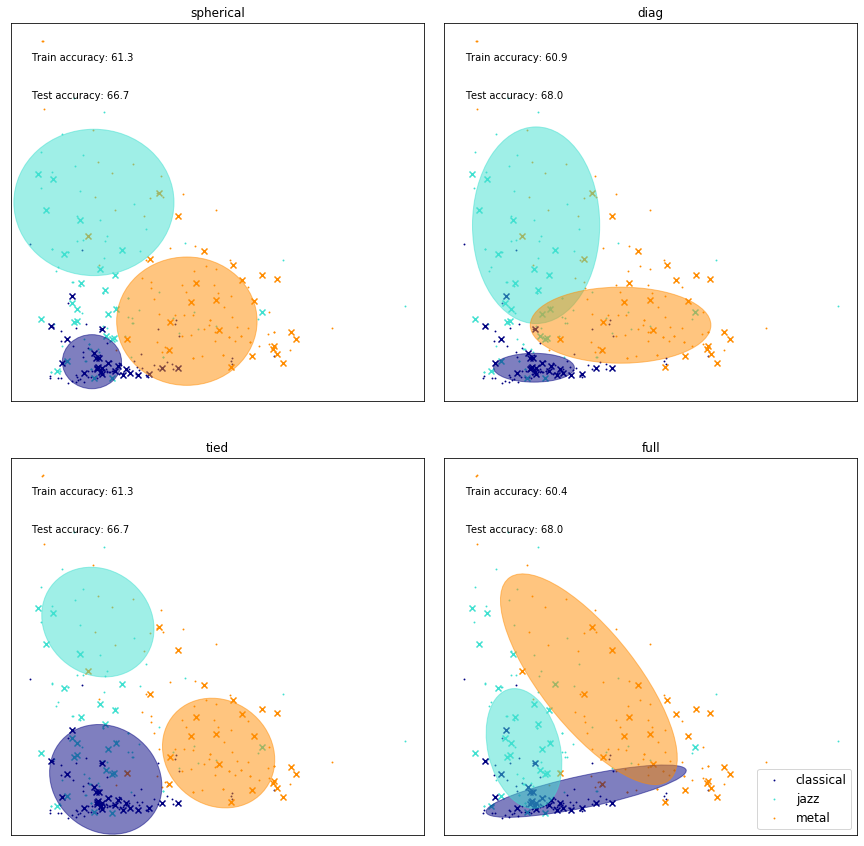

In [6]:
colors = ['navy', 'turquoise', 'darkorange']

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

        
(X, y) = datasets.load_svmlight_file("data/3genres.arff.libsvm")
X = X.toarray()
X = MinMaxScaler().fit_transform(X)
target_names = ['classical', 'jazz', 'metal']


# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(X, y)))

X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter=100, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

n_estimators = len(estimators)

fig = plt.figure(figsize=(6 * n_estimators // 2, 12))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05, left=.01, right=.99)

for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    text= h.text(0,0, "", va="bottom", ha="left")
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = X[y == n]
    # Plot the training data 
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))
plt.show()    

    

## Principal component analysis 

PCA is a tecnique for dimensionality reduction. In this example we take as input a similar audio feature data-set for the 3 genres we have been exploring but with 124 features per track instead. Using PCA we can reduce the dimensionality to 3 dimensions. 

(300, 124)


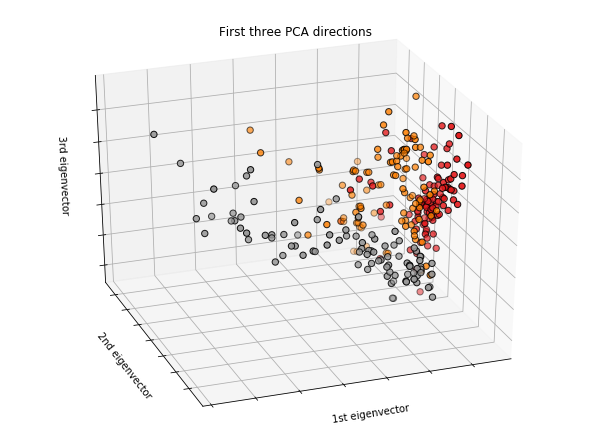

In [7]:
(X, y) = datasets.load_svmlight_file("data/3genres_full.arff.libsvm")
print(X.shape)
X = X.toarray()
X = MinMaxScaler().fit_transform(X)
target_names = ['classical', 'jazz', 'metal']

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()


We can use the reduced PCA vectors as a way to visualize the results of clustering in the high-dimensional (124) original feature space. 

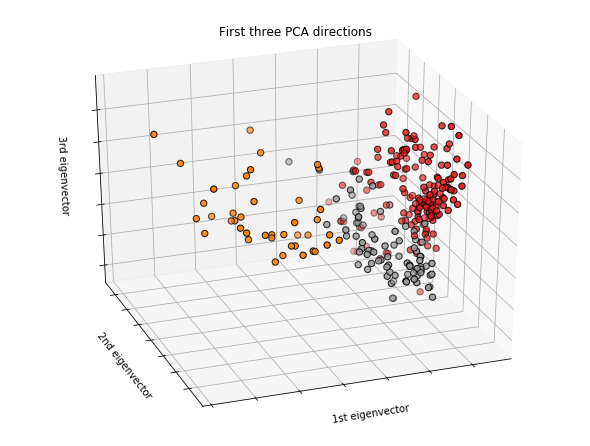

In [8]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_pred,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()


We can compare the accuracy of clustering using the original ground truth labels based on the 124 features vs the accuracy using the 3-dimensional features reduced by PCA. As can be seen the performance is similar - the increase might be due to reduction of noise in the features. 

In [9]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)
train_accuracy = np.mean(y_pred.ravel() == y.ravel()) * 100
print(train_accuracy)

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_reduced)
train_accuracy = np.mean(y_pred.ravel() == y.ravel()) * 100
print(train_accuracy)

53.666666666666664
42.333333333333336
